<a href="https://colab.research.google.com/github/Ranjeet1811/TensorFlow-Classification/blob/main/tf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})

In [ ]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

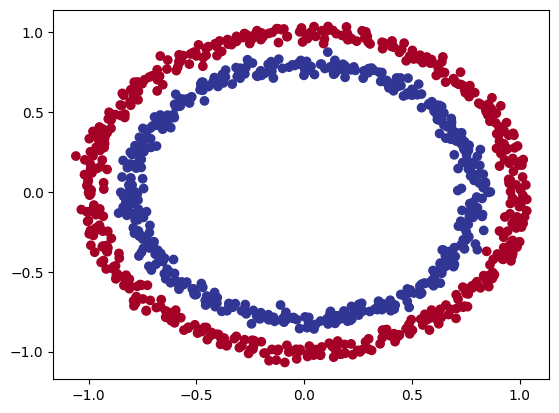

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 7s 7ms/step - loss: 5.8203 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 5.2404 - accuracy: 0.4830
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.3483 - accuracy: 0.4650
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 2.5402 - accuracy: 0.4860
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7518 - accuracy: 0.4940


In [ ]:

# Train our model for longer (more chances to look at the data)
model_1.fit(x, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_2.fit(x,y,epochs=100,verbose=0)

In [ ]:
 model_2.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937074661254883, 0.5]

In [ ]:
from keras.api._v2.keras import optimizers
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(x,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 3.8375 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2828 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7349 - accuracy: 0.4600
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4480
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4520
Epoch 11/

In [ ]:
import numpy as np
def plot_decision_boundary(model,x,y):
  x_min,x_max=x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max=x[:,1].min()-0.1,x[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred=model.predict(x_in)
  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classdification...")
    y_pred=np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
  # plot the decision bounsary 
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)  
  plt.xlim(xx.min(),xx.max())
  plt.xlim(yy.min(),yy.max())




313/313 [==============================] - 1s 1ms/step
doing binary classdification...


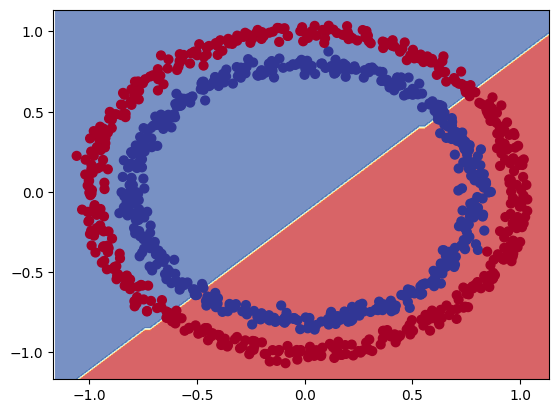

In [ ]:
plot_decision_boundary(model_3,x,y)

In [ ]:

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Regression problem, our model might work. In fact, let's try it.


# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:

# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)
     

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 493.4115 - mae: 493.4115
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 382.0464 - mae: 382.0464
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 274.1892 - mae: 274.1892
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 161.0117 - mae: 161.0117
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 57.5316 - mae: 57.5316
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 81.3518 - mae: 81.3518
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 82.7979 - mae: 82.7979
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 51.8943 - mae: 51.8943
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 49.0032 - mae: 49.0032
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 49.1673 - mae: 49.1673
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


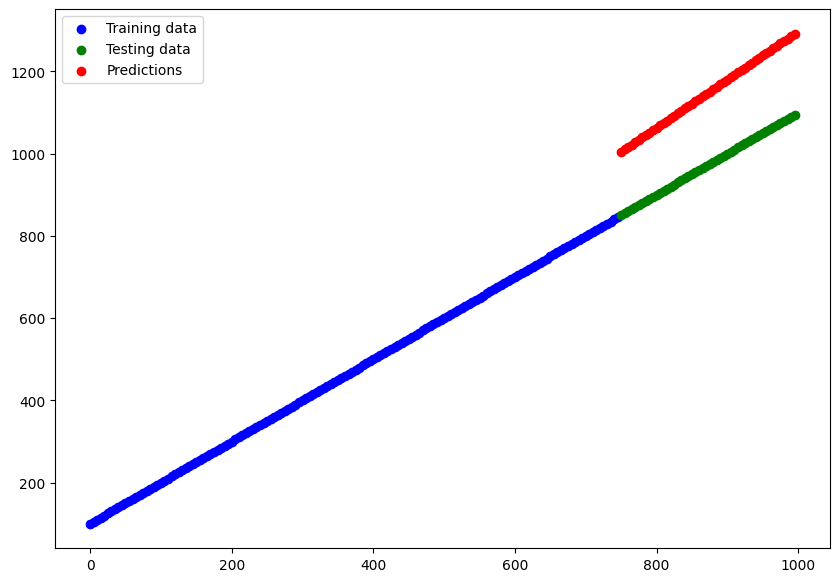

In [ ]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history=model_4.fit(x,y,epochs=100)
               

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.3529 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3131 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2566 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2042 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1897 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1706 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1378 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1338 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1229 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1174 - accuracy: 0.4820
Epoch 11/

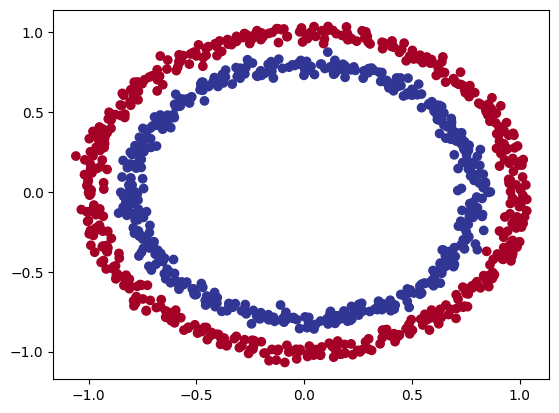

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classdification...


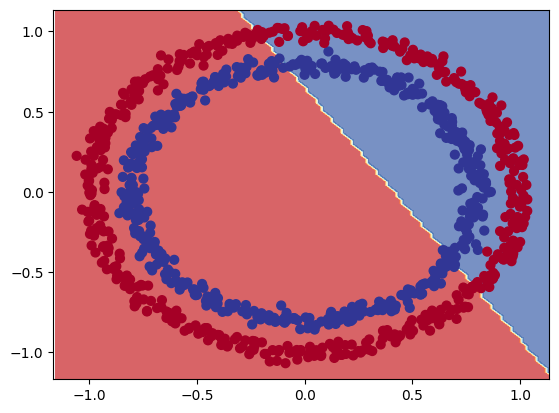

In [ ]:
plot_decision_boundary(model_4,x,y)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(x, y, epochs=100)
     

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 1.8436 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4386 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3229 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2431 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1788 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1276 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0508 - accuracy: 0.4340
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0197 - accuracy: 0.4120
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9901 - accuracy: 0.4150
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 1.7061 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1849 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0472 - accuracy: 0.4350
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9524 - accuracy: 0.4450
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8967 - accuracy: 0.4520
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8593 - accuracy: 0.4560
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8314 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7896 - accuracy: 0.4410
Epoch 11/

In [ ]:

# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8770


[0.3410434126853943, 0.8769999742507935]

313/313 [==============================] - 1s 2ms/step
doing binary classdification...


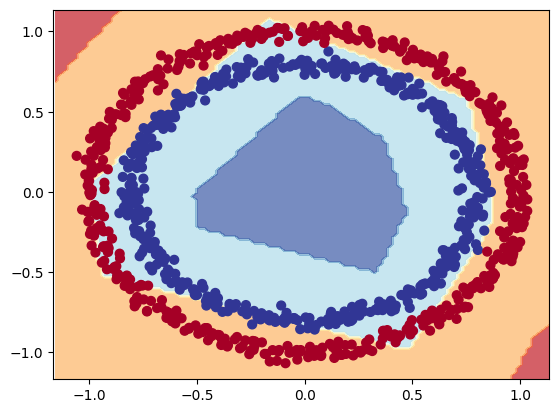

In [ ]:

# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(x, y, epochs=100, verbose=0)

In [ ]:

# Evaluate our model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.9940


[0.24920408427715302, 0.9940000176429749]

313/313 [==============================] - 1s 1ms/step
doing binary classdification...


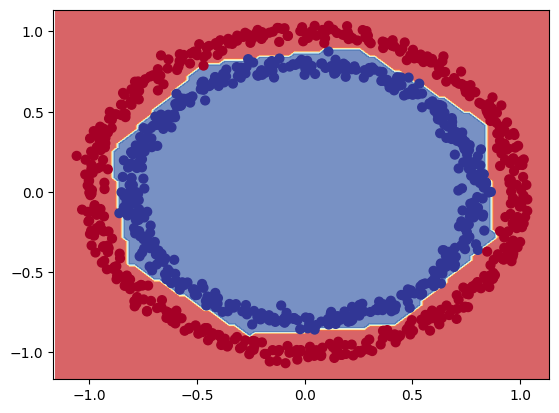

In [ ]:

# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, x, y)

<Axes: >

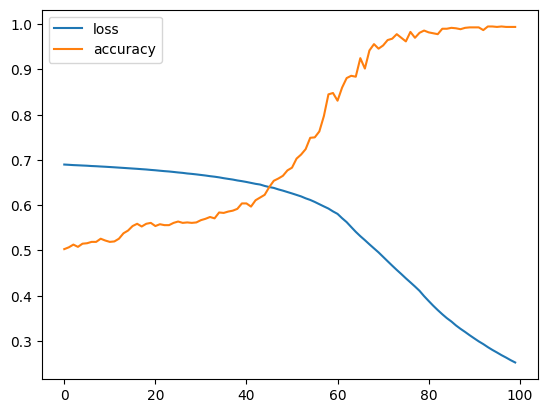

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A
     

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

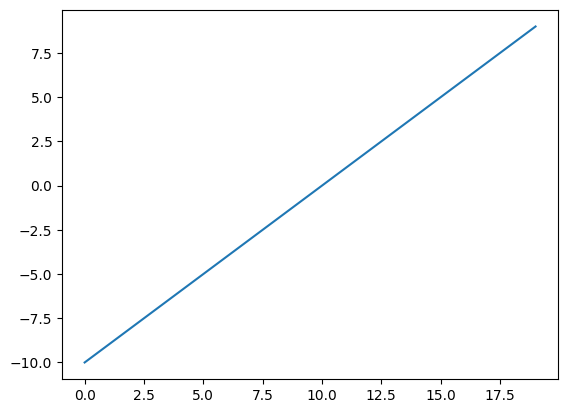

In [ ]:

# Visualize our toy tensor
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))
  sigmoid(A)

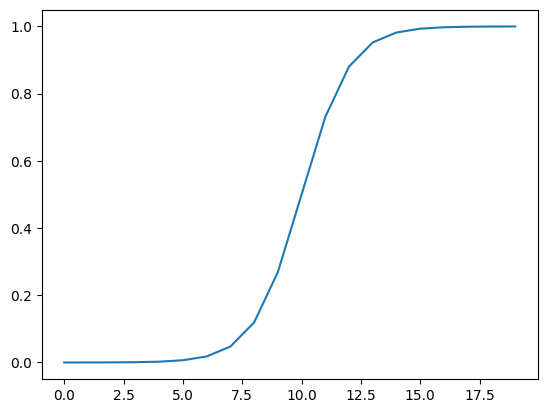

In [ ]:

# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

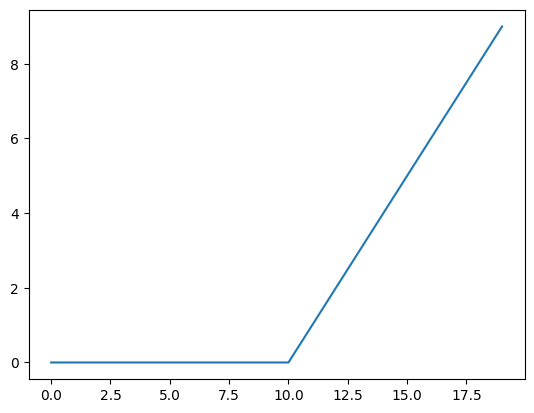

In [ ]:

# Plot sigmoid modified tensor
plt.plot(relu(A));

In [ ]:

# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:

# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
##Evaluating and improving our classification model

In [ ]:

# How many examples are in the whole dataset?
len(x)

1000

In [ ]:
# Split data into train and test sets
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape # 800 examples in the training set, 200 examples in the test set 
     

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7864 - accuracy: 0.4875
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.4750
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7180 - accuracy: 0.4675
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.4663
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.4638
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4575
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4575
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.4538
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4300
Epoch 11/

In [ ]:

# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.5100
Model loss on the test set: 0.6641840934753418
Model accuracy on the test set: 51.00%


313/313 [==============================] - 0s 1ms/step
doing binary classdification...
313/313 [==============================] - 0s 1ms/step
doing binary classdification...


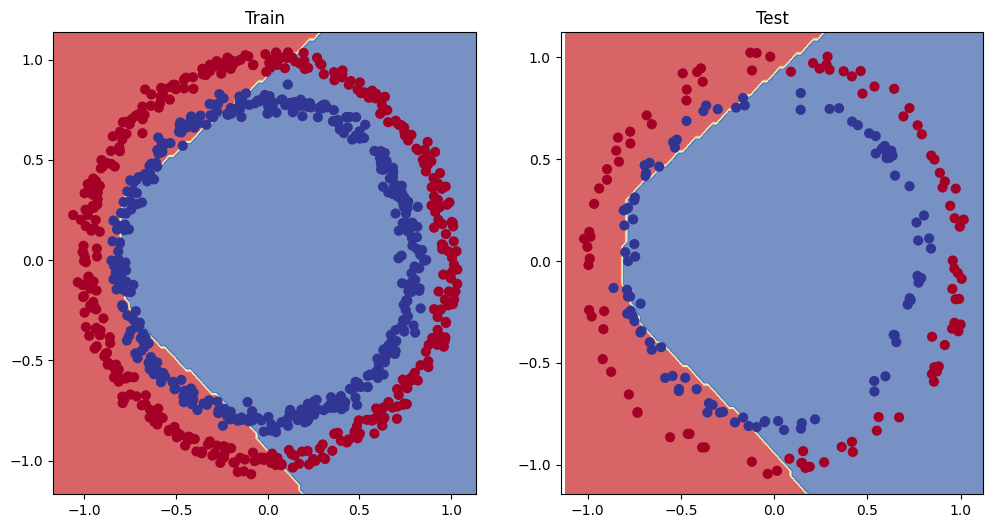

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,x=x_test,y=y_test)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.786382,0.48750
1,0.752355,0.48125
2,0.731703,0.47500
3,0.718010,0.46750
4,0.710727,0.46625
...,...,...
95,0.647073,0.57875
96,0.646001,0.58375
97,0.644399,0.59250
98,0.643013,0.59250


Text(0.5, 1.0, 'Model_8 training curves')

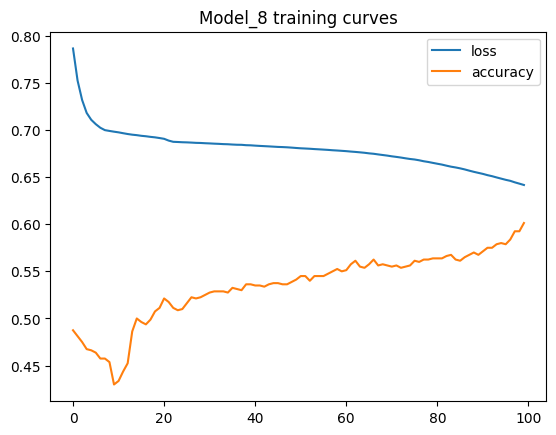

In [ ]:

# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")
     

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(x_train, 
                      y_train, 
                      epochs=50,
                      callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 2s 3ms/step - loss: 0.6905 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5138 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 -

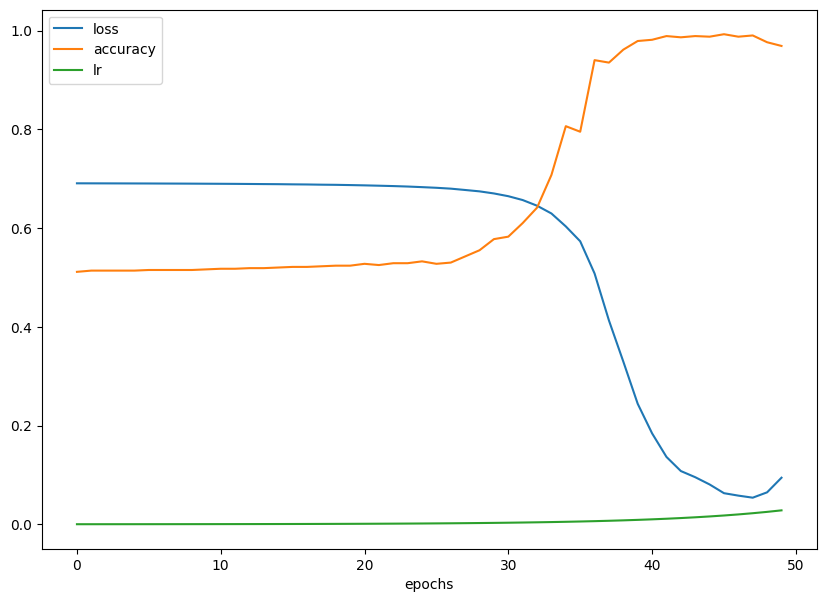

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

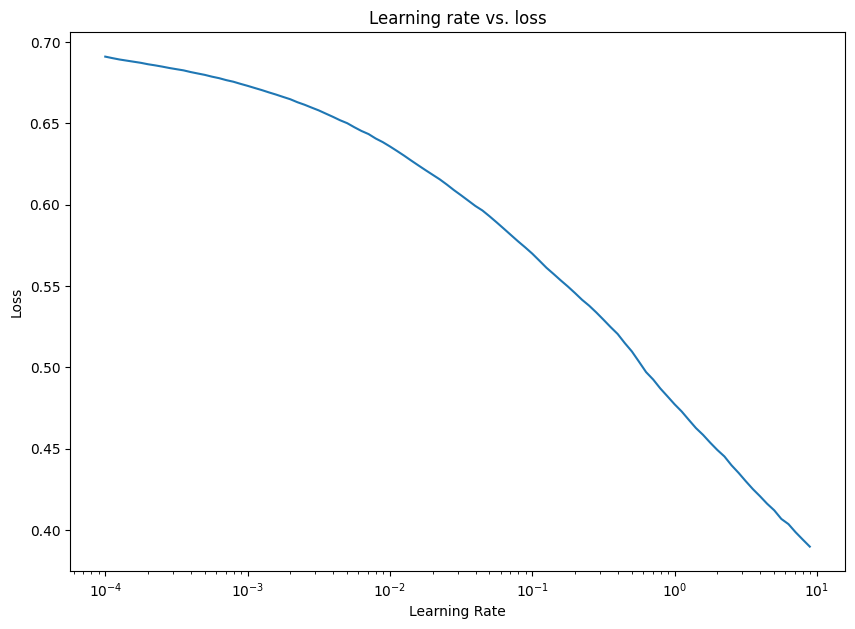

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.002), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6919 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5088
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5150
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5238
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5225
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5400
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5475
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5500
Epoch 11/

In [ ]:

# Evaluate model on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.9550


[0.3454829156398773, 0.9549999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classdification...
313/313 [==============================] - 0s 1ms/step
doing binary classdification...


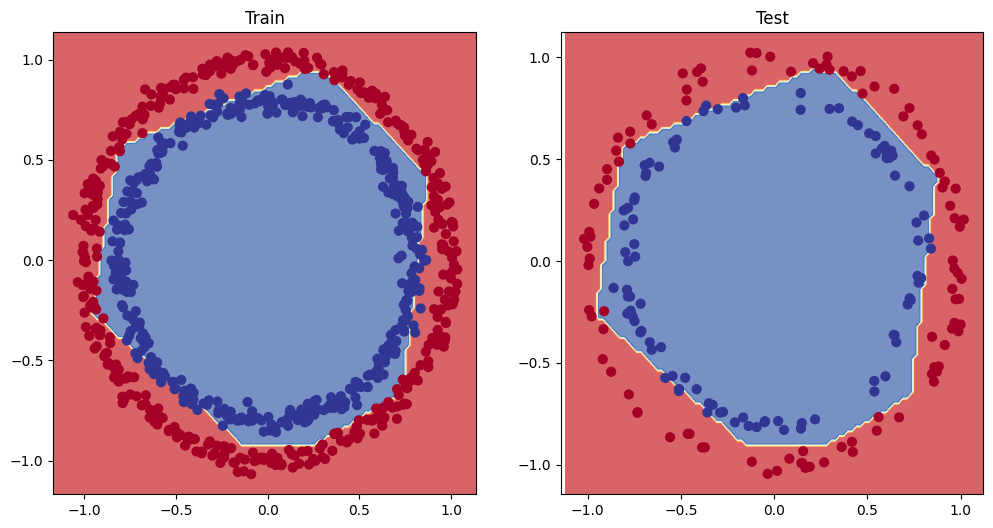

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

In [ ]:
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.9550
Model loss on test set: 0.3454829156398773
Model accuracy on test set: 95.50%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 7, 92]])

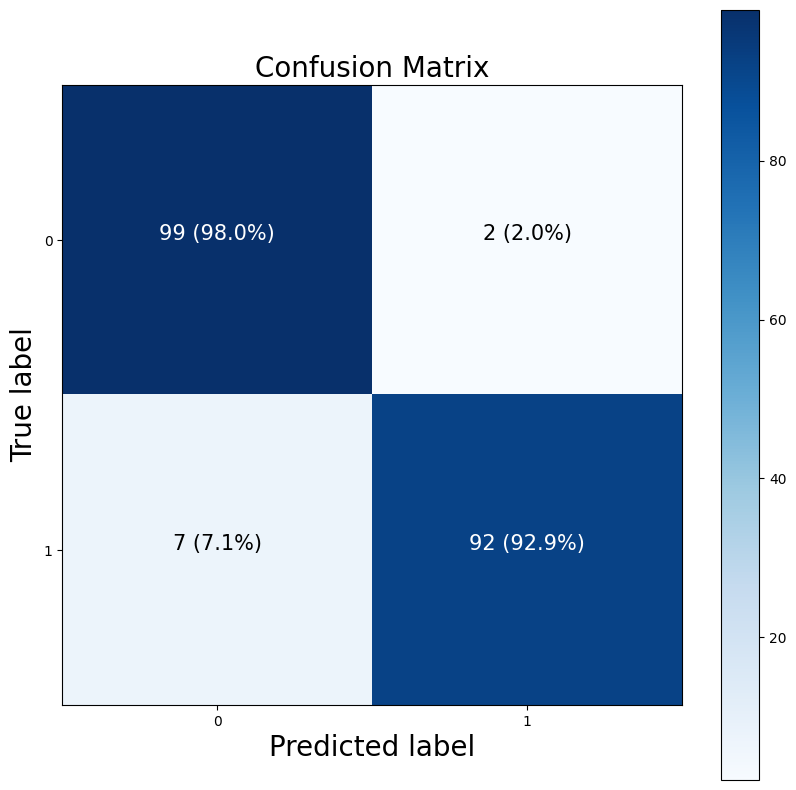

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The data has already been sorted into training and test set for us 
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [ ]:
print(f" Training sample: \n{train_data[0]}\n")
print(f" testing sample \n{test_labels[0]} \n")

 Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
test_labels[0]

9

In [ ]:
train_labels[0]

9

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:

# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

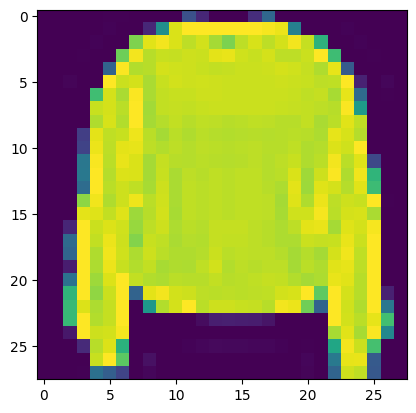

In [ ]:
# plot the single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)


10

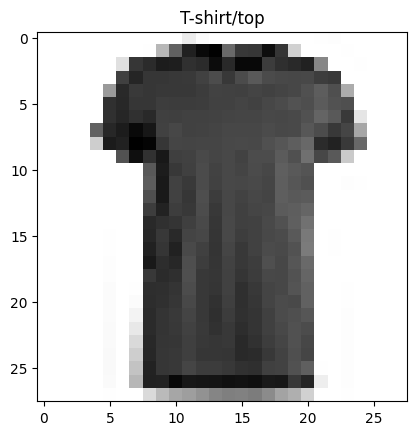

In [ ]:
# plot an example image and its label 
plt.imshow(train_data[17],cmap=plt.cm.binary)# change the colours to black & white
plt.title(class_names[train_labels[17]]);

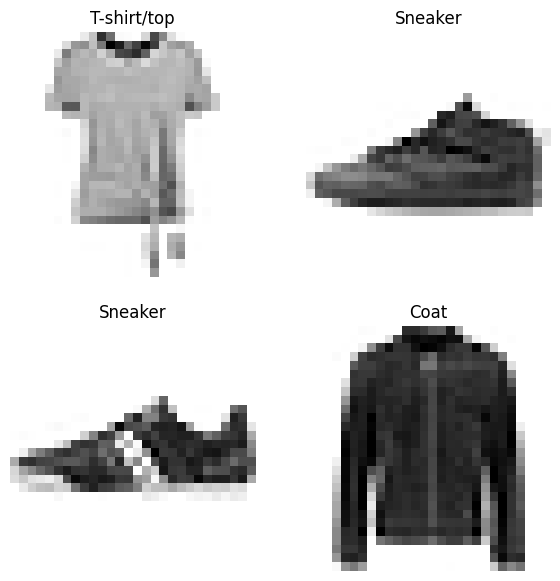

In [ ]:


# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")# output shape is 10, activation is softmax

])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
non_norm_history=model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels)) # see how the model performs on the test set during training



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3465 - accuracy: 0.1054 - val_loss: 2.2525 - val_accuracy: 0.1231
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2392 - accuracy: 0.1292 - val_loss: 2.2237 - val_accuracy: 0.1358
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2228 - accuracy: 0.1360 - val_loss: 2.2131 - val_accuracy: 0.1377
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1288 - accuracy: 0.1637 - val_loss: 1.8496 - val_accuracy: 0.2127
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7756 - accuracy: 0.2147 - val_loss: 1.7078 - val_accuracy: 0.2785
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6773 - accuracy: 0.2820 - val_loss: 1.6447 - val_accuracy: 0.2978
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6381 - accuracy: 0.2910 - val_loss: 1.6239 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 4)                 3140      
                                                                 
 dense_77 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()
     

(0, 255)

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data=train_data/255.0
test_data=test_data/255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()
     

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2579 - accuracy: 0.5238 - val_loss: 0.7745 - val_accuracy: 0.7112
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6988 - accuracy: 0.7563 - val_loss: 0.6811 - val_accuracy: 0.7637
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6264 - accuracy: 0.7845 - val_loss: 0.6331 - val_accuracy: 0.7792
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5987 - accuracy: 0.7941 - val_loss: 0.6178 - val_accuracy: 0.7876
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5851 - accuracy: 0.7983 - val_loss: 0.6106 - val_accuracy: 0.7855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5726 - accuracy: 0.8032 - val_loss: 0.6005 - val_accuracy: 0.7913
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5634 - accuracy: 0.8063 - val_loss: 0.6138 - val_accuracy

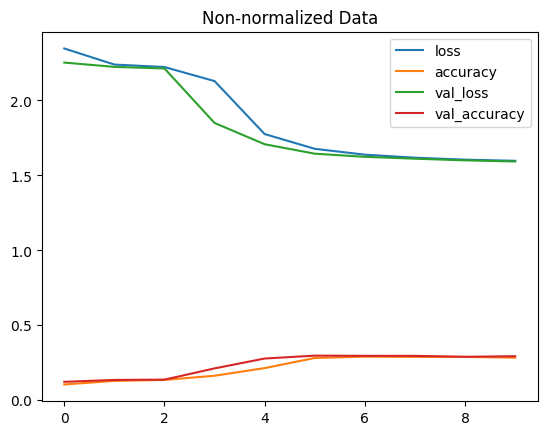

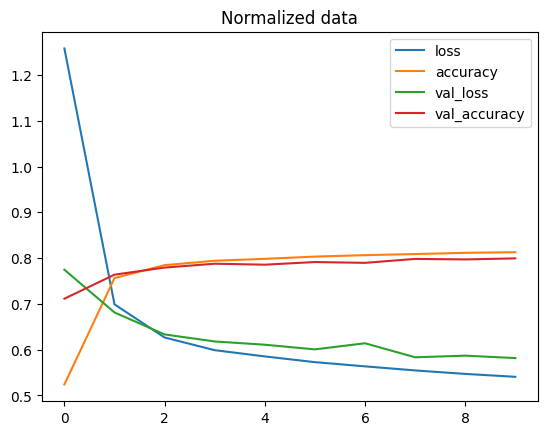

In [ ]:
# plot non-normallized data loss curves
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# plot normal data loss curves 
pd.DataFrame(norm_history.history).plot(title="Normalized data"); 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 12s 5ms/step - loss: 1.2848 - accuracy: 0.5008 - val_loss: 1.0181 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9365 - accuracy: 0.6182 - val_loss: 0.9019 - val_accuracy: 0.6216 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8672 - accuracy: 0.6440 - val_loss: 0.8716 - val_accuracy: 0.6589 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8297 - accuracy: 0.6712 - val_loss: 0.8440 - val_accuracy: 0.6639 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7783 - accuracy: 0.7029 - val_loss: 0.7995 - val_accuracy: 0.7147 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7281 - accuracy: 0.7455 - val_loss: 0.7430 - val_accuracy: 0.7457 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7

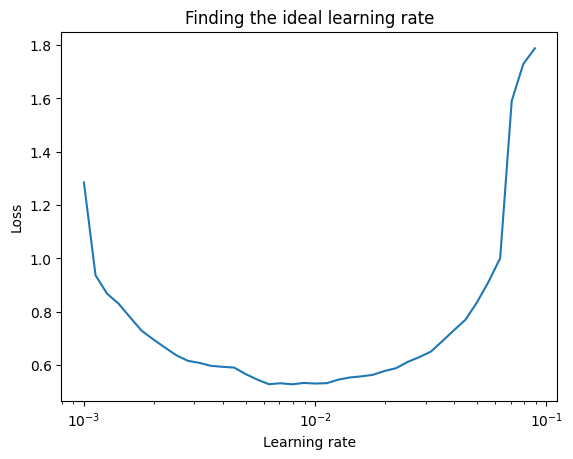

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1364 - accuracy: 0.5768 - val_loss: 0.6943 - val_accuracy: 0.7487
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6329 - accuracy: 0.7798 - val_loss: 0.6269 - val_accuracy: 0.7881
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5764 - accuracy: 0.8037 - val_loss: 0.5935 - val_accuracy: 0.7937
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5516 - accuracy: 0.8120 - val_loss: 0.5718 - val_accuracy: 0.8050
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5380 - accuracy: 0.8158 - val_loss: 0.5665 - val_accuracy: 0.8026
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5261 - accuracy: 0.8186 - val_loss: 0.5765 - val_accuracy: 0.8031
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5188 - accuracy: 0.8219 - val_loss: 0.5473 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.00996540e-05, 5.23424592e-16, 1.25261550e-07, 6.75901646e-08,
        2.28100077e-07, 2.55222797e-01, 6.56284508e-04, 1.09675415e-01,
        5.59115037e-02, 5.78523517e-01],
       [3.51211347e-04, 7.21166060e-08, 9.39664960e-01, 9.10162612e-08,
        2.25876998e-02, 0.00000000e+00, 3.69825251e-02, 1.91788804e-20,
        4.13469505e-04, 3.40607805e-20],
       [1.05570996e-06, 9.99069870e-01, 1.02979517e-04, 6.19061466e-04,
        2.06287019e-04, 2.22726902e-33, 6.96792142e-07, 2.28445977e-16,
        1.80354551e-11, 7.46282833e-21],
       [4.19137768e-06, 9.97305155e-01, 1.08991313e-04, 2.37467699e-03,
        2.05232136e-04, 1.56311122e-27, 1.78108053e-06, 8.47472185e-14,
        1.55983976e-10, 5.96108412e-18],
       [1.13408193e-01, 7.11146185e-06, 1.23244263e-01, 9.40592680e-03,
        3.52056734e-02, 5.51495249e-21, 7.05706000e-01, 5.12921297e-08,
        1.30227385e-02, 1.66519261e-08]], dtype=float32)

In [ ]:

# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]
     

(9, 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)
     

array([[765,   1,  32,  88,   3,   0,  94,   1,  16,   0],
       [  1, 954,  14,  24,   4,   0,   1,   0,   2,   0],
       [ 21,   7, 737,  12, 146,   0,  58,   0,  19,   0],
       [ 40,  25,  22, 817,  39,   0,  50,   1,   6,   0],
       [  2,   2, 129,  21, 760,   0,  72,   0,  14,   0],
       [  1,   0,   0,   0,   0, 912,   0,  46,  12,  29],
       [148,   2, 146,  44, 137,   0, 481,   0,  41,   1],
       [  0,   0,   0,   0,   0,  42,   0, 919,   3,  36],
       [  9,   0,  12,   6,   1,   5,  21,   5, 940,   1],
       [  2,   0,   0,   0,   0,  20,   0,  48,   4, 926]])

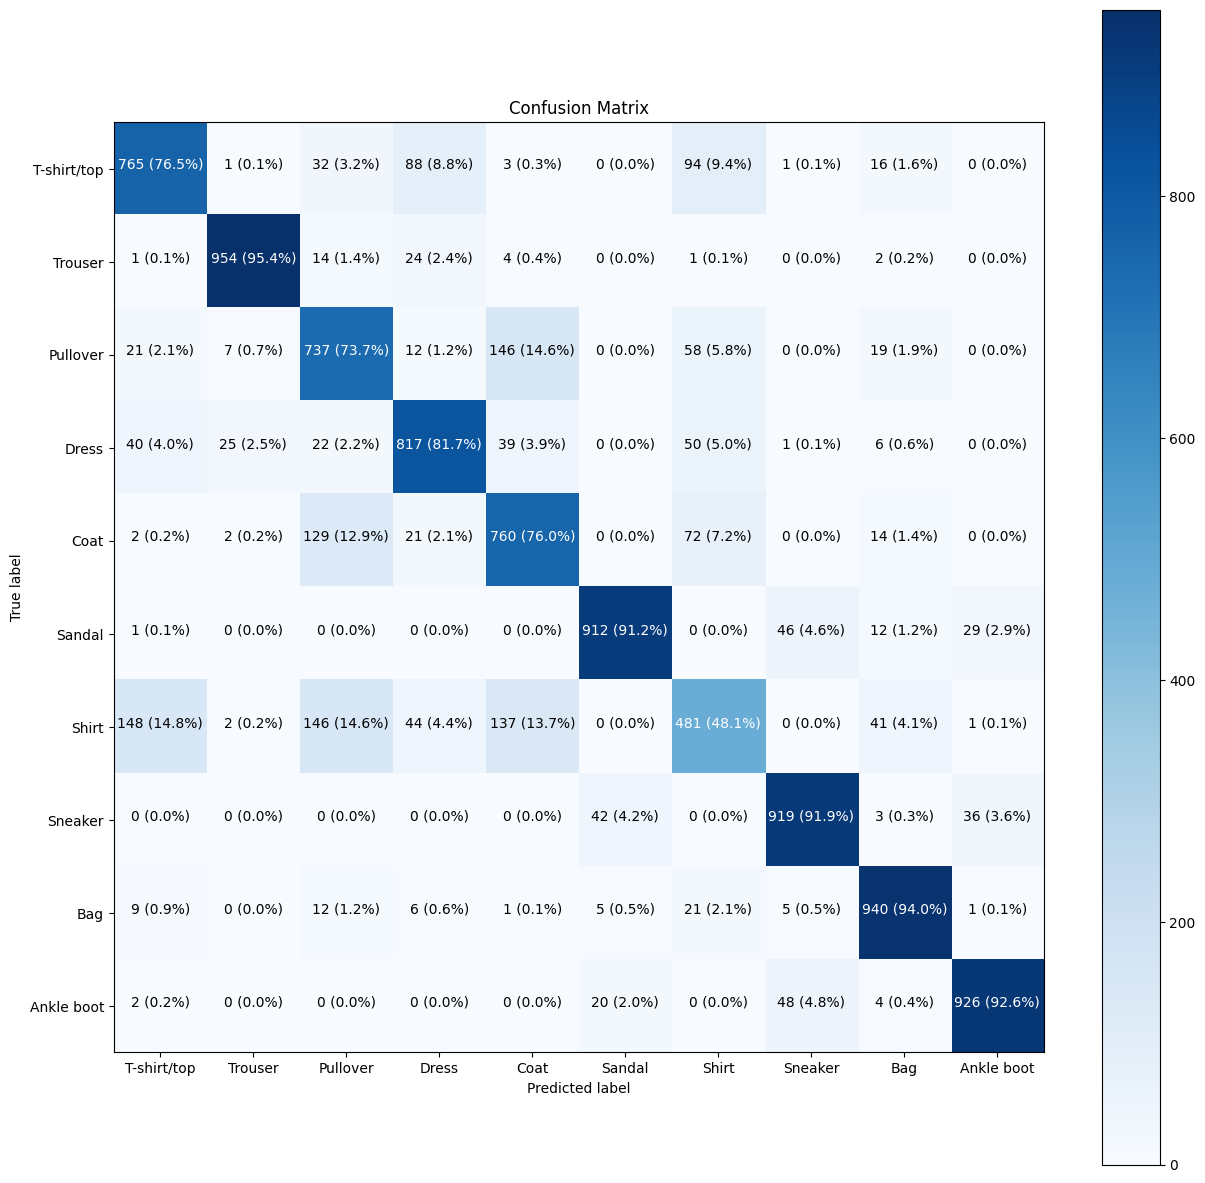

In [ ]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 18ms/step


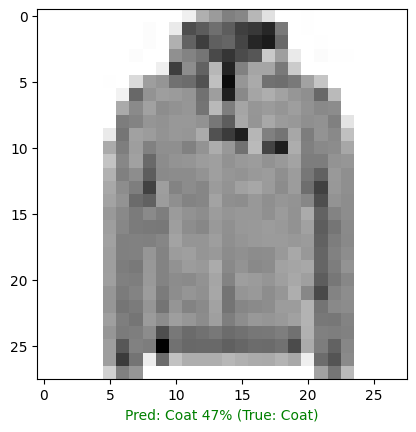

In [ ]:

# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [ ]:

# Find the layers of our most recent model
model_14.layers

In [ ]:

# Extract a particular layer
model_14.layers[1]
     

In [ ]:
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.6538366 ,  0.36314273, -0.85565495,  0.48439994],
        [-0.4463522 ,  0.05883638, -0.3104482 , -0.6866809 ],
        [-0.8130933 ,  0.6646929 , -0.685721  , -0.5121594 ],
        ...,
        [-0.423788  ,  0.1948028 ,  0.02006081, -0.42964956],
        [-0.6399249 , -0.06064938,  0.6441588 , -0.22027834],
        [-0.15267015,  0.17279014, -0.07135314,  0.14218876]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape
     

(array([ 0.44354782, -0.02868183,  0.17409307,  0.52447015], dtype=float32),
 (4,))

In [ ]:

# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_85 (Dense)            (None, 4)                 3140      
                                                                 
 dense_86 (Dense)            (None, 4)                 20        
                                                                 
 dense_87 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


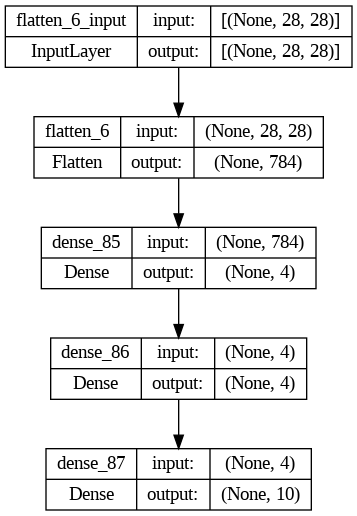

In [ ]:


from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)